## Demand Projections

### Steel 
1. Estimation of activity data until 2050 while differentiating between the electric arc and the integrated arc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### Input assumptions
#### Electric arc
No hydrogen demand as fully using metal scraps and electricity (Neuwirth(2022) Appendix B) 

#### Integrated Steel
Specific Energy Consumption (SEC) for DRI Steel route is 1.89 MWh/t of produced steel (Neuwirth (2022))   
Müller (2021): For the use of carbon-free CDRI an increase from ε_{el,cs} = 1.76 GJ/tcs (steel scrap processing) to ε_{el,cs} = 2.26 GJ/t_{cs} (DRI processing) can be noticed. 
(Further inquire how the energy demand changes)




In [3]:
steel_int_kt = pd.read_excel("../Scripts/Results/2025_01_29_ind_kt_European Union - 27 countries (from 2020).xlsx", sheet_name="Integrated_steelworks_(kt_steel")
steel_elec_kt = pd.read_excel("../Scripts/Results/2025_01_29_ind_kt_European Union - 27 countries (from 2020).xlsx", sheet_name="Electric_arc_(kt_steel)")

In [4]:
SEC_H2 = 1.89  # Mwh/t_steel
LHV_H2 = 33.3  # t_h2/Mwh 
H2_demand_t__per_t_steel =SEC_H2*LHV_H2

In [5]:
steel_int_kt["Demand in tH2"] = steel_int_kt["Predicted Demand"]*H2_demand_t__per_t_steel*1000

### Chemicals
Production for primary Steel, Methanol, Ammonia and Ethylene are factory specific estimated in Neuwirth et al (2024). 
Overall production for basic chemcials are calculated in JRC data in kt ethylene eq. 

The share of ammonia, methanol and ethylene and remaining is estimated based on the data from Neuwirth et al (2024). For this for the production must be converted from t of methanol/ammonia to t of ethylene eq. using SEC [GJ/tonne of output] data from Saygin et al (2011) 
| Country  | SEC_Meth | SEC_Amm | SEC_HVC |
|----------|----------|---------|---------|
| Benelux  | 10       | 14.3    | 15.3    |
| FR       |          | 16.5    | 15.4    |
| DE       | 12.4     | 16.6    | 15.7    |
| IT       |          | 15      | 15.9    |
| Average  | 11.2     | 15.6    | 15.575  |



Once this is done the share in each country can be calculated. Then the conversion to hydrogen processes can be estimated by Neuwirth 2022. Methanol consumption based on data in appendix B.2. Chemical Industry
| Product  | Feedstock | Unit |
|----------|-----------|------|
| Methanol | 6.31      | MWh/tH2    | 
| Ammonia  | 5.92      | MWh/tH2    |
| Ethylene | 2.54      | MWh/t_MeOH |

In [6]:
chemicals_JRC = pd.read_excel("../Scripts/Results/2025_01_29_ind_kt_European Union - 27 countries (from 2020).xlsx", sheet_name="Basic_chemicals_(kt_ethylene_eq")
production_Neuwirth_2024 = pd.read_excel("../Industry_Data/Neuwirth_2024_Supplementary_Data/02_Industrial_Site_Database.xlsx", sheet_name="Database")

In [7]:
# in GJ/t
SEC_MeOH_Benelux = 10 
SEC_MeOH_DE = 12.4
SEC_MeOH_Average = 11.2

SEC_NH3_Benelux = 14.3
SEC_NH3_FR = 16.5
SEC_NH3_DE = 16.6
SEC_NH3_IT = 15 
SEC_NH3_Average = 15.6

SEC_HVC_Benelux = 15.3 
SEC_HVC_FR = 15.4
SEC_HVC_DE = 15.7
SEC_HVC_IT = 15.9
SEC_HVC_Average = 15.575 

# In GWh/t 
SEC_HVC_Benelux_GWh = SEC_HVC_Benelux/3600
SEC_HVC_FR_GWh = SEC_HVC_FR/3600
SEC_HVC_DE_GWh = SEC_HVC_DE/3600
SEC_HVC_IT_GWh = SEC_HVC_IT/3600
SEC_HVC_Average_GWh = SEC_HVC_Average/3600





In [8]:
# Conversion to get the ethylene eq for methanol and ammonia
MeOH_to_HVC = SEC_MeOH_Average/SEC_HVC_Average 
NH3_to_HVC = SEC_NH3_Average/SEC_HVC_Average

# Methanol demand for producing ethylene
HVC_to_MeOH = 2.54

In [9]:
steel_Neuwirth_2024 = production_Neuwirth_2024.query("Product == 'Steel, primary'")
HVC_Neuwirth_2024 = production_Neuwirth_2024.query("Product == 'Ethylene'")
MeOH_Neuwirth_2024 = production_Neuwirth_2024.query("Product == 'Methanol'")
NH3_Neuwirth_2024 = production_Neuwirth_2024.query("Product == 'Ammonia'")

In [10]:
steel_Neuwirth_2024_SUM = steel_Neuwirth_2024["Production in tons (calibrated)"].sum()
HVC_Neuwirth_2024_SUM = HVC_Neuwirth_2024["Production in tons (calibrated)"].sum()
MeOH_Neuwirth_2024_SUM = MeOH_Neuwirth_2024["Production in tons (calibrated)"].sum()
NH3_Neuwirth_2024_SUM = NH3_Neuwirth_2024["Production in tons (calibrated)"].sum()

In [11]:
HVC_Neuwirth_2024_SUM/1000

18860.410514370004

#### JRC on Chemical sector
![JRC Chemicals](../Industry_Data/JRC_Chemicals.png)

#### Chemicals in Neuwirth 2024 and JRC 2022 (estimated), last year of data 2021
Neuwirth estimates to 34,145 kt ethylene eq  
JRC overall chemical sector 86,747 kt ethylene eq , however this includes several other forms of chemcials. Therefore a percentage is taken of the current situation and this is projected with the JRC data.
then the shares are converted from ethylene equivalents to methanol or ammonia demand 


In [15]:
# Get ethylene eq to compare
MeOH_Neuwirth_2024_SUM_ethylene_eq = MeOH_Neuwirth_2024_SUM*MeOH_to_HVC
NH3_Neuwirth_2024_SUM_ethylene_eq = NH3_Neuwirth_2024_SUM*NH3_to_HVC

In [16]:
Neuwirth_chemicals_SUM = HVC_Neuwirth_2024_SUM + MeOH_Neuwirth_2024_SUM_ethylene_eq + NH3_Neuwirth_2024_SUM_ethylene_eq

In [17]:
# from t ethylene eq to kt ethylene eq
Neuwirth_chemicals_SUM/1000 

34145.49946406631

In [18]:
chemicals_JRC.query("Year == @pd.Timestamp('2022-01-01')")["Predicted Demand"][0]

89685.03265680026

In [19]:
share_MeOH= (MeOH_Neuwirth_2024_SUM_ethylene_eq/1000)/(chemicals_JRC.query("Year == @pd.Timestamp('2022-01-01')")["Predicted Demand"][0])
share_NH3 = (NH3_Neuwirth_2024_SUM_ethylene_eq/1000)/(chemicals_JRC.query("Year == @pd.Timestamp('2022-01-01')")["Predicted Demand"][0])
share_ethylene =(HVC_Neuwirth_2024_SUM/1000)/(chemicals_JRC.query("Year == @pd.Timestamp('2022-01-01')")["Predicted Demand"][0])

In [20]:
chemicals_JRC["MeOH Demand [kt ethylene eq]"] = (chemicals_JRC["Predicted Demand"]*share_MeOH)
chemicals_JRC["NH3 Demand [kt ethylene eq]"] = (chemicals_JRC["Predicted Demand"]*share_NH3)
chemicals_JRC["HVC Demand [kt ethylene eq]"] = chemicals_JRC["Predicted Demand"]*share_ethylene


In [21]:
chemicals_JRC["MeOH Demand [kt MeOH]"] = (chemicals_JRC["MeOH Demand [kt ethylene eq]"])/MeOH_to_HVC
chemicals_JRC["NH3 Demand [kt NH3]"] = (chemicals_JRC["NH3 Demand [kt ethylene eq]"])/NH3_to_HVC
chemicals_JRC["HVC Demand [kt MeOH]"] = chemicals_JRC["HVC Demand [kt ethylene eq]"]*SEC_HVC_Average_GWh*HVC_to_MeOH


In [22]:
SEC_HVC_Average_GWh*HVC_to_MeOH*18860.410514

207.257575038638

In [23]:
chemicals_JRC

,Year,Predicted Demand,MeOH Demand [kt ethylene eq],NH3 Demand [kt ethylene eq],HVC Demand [kt ethylene eq],MeOH Demand [kt MeOH],NH3 Demand [kt NH3],HVC Demand [kt MeOH]
0,2022-01-01,89685.032657,2030.487011,13254.601938,18860.410514,2823.646000,13233.360589,207.257575
1,2023-01-01,90330.911668,2045.109841,13350.056765,18996.236337,2843.980872,13328.662443,208.750169
2,2024-01-01,90976.790680,2059.732670,13445.511591,19132.062159,2864.315745,13423.964296,210.242763
3,2025-01-01,91622.669691,2074.355500,13540.966417,19267.887981,2884.650617,13519.266150,211.735356
4,2026-01-01,92277.819442,2089.188221,13637.791371,19405.663403,2905.277369,13615.935936,213.249374
5,2027-01-01,92932.969192,2104.020942,13734.616325,19543.438825,2925.904122,13712.605721,214.763392
6,2028-01-01,93588.118942,2118.853663,13831.441278,19681.214248,2946.530874,13809.275507,216.277410
7,2029-01-01,94243.268692,2133.686383,13928.266232,19818.989670,2967.157627,13905.945293,217.791428
8,2030-01-01,94898.418442,2148.519104,14025.091186,19956.765092,2987.784379,14002.615078,219.305446
9,2031-01-01,95560.018630,2163.497864,14122.869454,20095.897016,3008.614218,14100.236650,220.834371


##### Validation Comparison Neuwirth data and JRC
More capacity estimated in Neuwirth [84,963 kt] Steel capacity compared to JRC Steel production [79,155 kt] in Europe

In [24]:
steel_Neuwirth_2024_SUM/1000

84963.23024100001

In [25]:
steel_int_kt["Predicted Demand"][0]

76530.19699254056

#### Melting and Casting of Iron and Steel, Aluminium production, NE Metals
UBA: TRL 9 of electrification therefore full electrification considered




#### Steam Production  
Electrical alternative have a TRL of 9 where several alternative are available such as the electrode boiler, heat pump systems etc. 

#### Metal processsesing in Macherinery and transport equipement  
Mainly eletric, rest could be green fuels but relatively small


#### Cement

Green fuel demand only in preheating and clinker production. Currently, 67% using already alternative heating sources such as different forms of waste.  
The TRL of the alternative production routes is fairly low with levels of <3 for a full electrification, <4 for hydrogen heating systems. Alternative options are hybrid versions discussed, the TRL levels remain low.  
Workaround: 
1. Replacing fossil fuel in the process of clinker production and Preheating and pre calcination process which is specifically distingished in JRC data set
2. Assuming waste as input
3. Increase waste share according to regression analysis, remaining share is taken from hydrogen/electricity 

##### Cement Biomass Content
1. Clean Data read from excel file
2. Get relevant data from fuel demand 
3. Get Percentage for biomass content
4. Match with overall fuel consumption (Forecast)

In [26]:
def transpose_uniformly(df):
    df_T = df.transpose()
    df_T.columns = df_T.iloc[0]
    df_T.drop(["EU27: Non-metallic mineral products / final energy consumption", "Code"], axis=0, inplace = True)
    df_T.index.name = 'Year'
    df_T.index= pd.to_datetime(df_T.index, format='%Y')
    return(df_T)

In [41]:
def linear_regression_with_prediction(demand_sector_df, future_data_df, column_name_LR, column_name_IV, column_name_IV_future,  graph_title, save=False):
    """
    Perform a simple linear regression on historical data, visualize results, and predict future values.
    
    Parameters:
    - demand_sector_df: DataFrame containing historical demand data.
    - future_data_df: DataFrame containing future values of the independent variable for prediction.
    - column_name_LR: Name of the column in demand_sector_df to be used as the target variable (y).
    - column_name_IV: Name of the column in demand_sector_df and future_data_df to be used as the independent variable (X).
    - save: Boolean indicating whether to save the results to an Excel file.
    
    Returns:
    - A DataFrame containing historical and future predictions.
    """

    # Define the target (y) and feature (X) for historical data
    y = demand_sector_df[column_name_LR]  # Convert y to a Series
    X = demand_sector_df[[column_name_IV]]  # Independent variable (e.g., GDP)

    # Drop NaN values to avoid regression errors
    X = X.dropna()
    y = y.loc[X.index]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict historical values
    y_pred = model.predict(X)

    # Combine predictions and actual values into a results DataFrame
    results_historical = pd.DataFrame({
        'Actual Percentage': y,
        'Predicted Percentage': y_pred
    }, index=X.index)

    # Prepare future data for prediction
    future_data_df = future_data_df.rename(columns={column_name_IV_future: column_name_IV})
    X_future = future_data_df[[column_name_IV]].dropna()  # Independent variable for future data
    y_future_pred = model.predict(X_future)

    # Combine future predictions into a results DataFrame
    results_future = pd.DataFrame({
        'Predicted Percentage': y_future_pred
    }, index=X_future.index)

    # Combine historical and future results
    combined_results = pd.concat([results_historical[['Predicted Percentage']], results_future], axis=0)

    # Plot historical actual vs. predicted values and future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(results_historical.index, results_historical['Actual Percentage'], label='Actual Percentage (Historical)', color='blue')
    plt.plot(results_historical.index, results_historical['Predicted Percentage'], label='Predicted Percentage (Historical)', color='orange', linestyle='--')
    plt.plot(results_future.index, results_future['Predicted Percentage'], label='Predicted Percentage (Future)', color='green', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel(f'{column_name_LR}')
    plt.title(graph_title)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save results to Excel if requested
    if save:
        combined_results.to_excel(f"results_{column_name_LR}_demand_with_predictions.xlsx")
    
    return combined_results


In [28]:
NMM = pd.read_excel("..\JRC_DATA\JRC-IDEES-2021\EU27\JRC-IDEES-2021_Industry_EU27.xlsx", sheet_name="NMM_fec")
NMM.columns = NMM.columns.astype(str)  # Ensure all column names are strings
NMM_cleaned = NMM.loc[:, ~NMM.columns.str.contains('^Unnamed:')]
NMM_cleaned.dropna(how='any', inplace = True)
NMM_cleaned.reset_index(drop=True, inplace=True)


C:\Users\flv.eco\AppData\Local\Temp\ipykernel_4444\3510686874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NMM_cleaned.dropna(how='any', inplace = True)


In [29]:
cement = NMM_cleaned.iloc[:(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics & other NMM"].index[0])]
ceramics = NMM_cleaned.iloc[(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics & other NMM"].index[0]):(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Glass production"].index[0])]
glass = NMM_cleaned.iloc[(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Glass production"].index[0]):(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Glass: Finishing processes"].index[0]+1)]

In [30]:
cement_preheating = cement.iloc[(cement[cement["EU27: Non-metallic mineral products / final energy consumption"] == "Cement: Pre-heating and pre-calcination"].index[0]):(cement[cement["EU27: Non-metallic mineral products / final energy consumption"] == "Cement: Clinker production (kilns)"].index[0])]
cement_clinker = cement.iloc[(cement[cement["EU27: Non-metallic mineral products / final energy consumption"] == "Cement: Clinker production (kilns)"].index[0]):(cement[cement["EU27: Non-metallic mineral products / final energy consumption"] == "Cement: Grinding, packaging and precasting (electricity)"].index[0])]
cement

,EU27: Non-metallic mineral products / final energy consumption,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Code
0,Cement,18262.727713,17905.354459,17666.657484,18042.231733,18543.962697,18439.647742,19831.911971,20042.656616,18283.066017,...,12109.806842,12316.185034,12245.908459,12238.148039,12722.281889,13056.547546,12944.308438,12824.896242,12931.980560,FEC.ktoe.EU27.NMM.CEM.TOTAL.TOTAL.TOTAL
1,Lighting,87.821573,86.106736,84.962590,86.757842,89.182317,88.674844,95.380847,96.415740,87.904944,...,58.128607,59.120383,58.786676,58.770640,61.086676,62.710905,62.173738,61.598383,62.122243,FEC.ktoe.EU27.NMM.CEM.LIGHT.GENERIC.ELEC
2,Air compressors,35.114653,34.428991,33.971514,34.689330,35.658734,35.455825,38.137159,38.550952,35.147988,...,23.242192,23.638744,23.505314,23.498903,24.424949,25.074382,24.859601,24.629550,24.839010,FEC.ktoe.EU27.NMM.CEM.AIRCOMP.GENERIC.ELEC
3,Motor drives,145.227453,145.344859,150.202434,146.005927,152.209332,155.808121,183.137267,181.223941,159.278808,...,104.849409,108.569536,107.717852,106.909478,116.779049,117.595760,117.555490,112.831977,118.571581,FEC.ktoe.EU27.NMM.CEM.MOTOR.GENERIC.ELEC
4,Fans and pumps,17.522385,17.180236,16.951953,17.310147,17.793884,17.692632,19.030631,19.237115,17.539019,...,11.597968,11.795850,11.729268,11.726068,12.188170,12.512240,12.405063,12.290267,12.394789,FEC.ktoe.EU27.NMM.CEM.FANS.GENERIC.ELEC
5,Low-enthalpy heat,73.772797,72.492947,72.174199,72.836516,74.616137,75.481715,84.306592,83.903295,76.062999,...,49.445565,52.880334,53.618033,54.156239,57.977443,59.673581,60.473607,60.443530,61.780526,FEC.ktoe.EU27.NMM.CEM.LOW_ENTH.TOTAL.TOTAL
6,Diesel oil and liquid biofuels,2.737481,2.673342,2.317254,2.346650,2.127710,2.042718,1.730390,2.335107,2.501965,...,1.354623,1.221395,1.226158,1.149519,1.136142,1.191600,1.188561,1.209201,1.336086,FEC.ktoe.EU27.NMM.CEM.LOW_ENTH.THERM.DIESEL_LI...
7,Natural gas and biogas,46.975900,45.613660,43.507731,46.381755,45.756693,45.259539,46.215633,45.604037,41.711846,...,26.818373,26.031911,24.906309,24.711042,25.516422,26.098422,25.622125,25.841721,25.985851,FEC.ktoe.EU27.NMM.CEM.LOW_ENTH.THERM.NG_BIOGAS
8,Solar and geothermal,0.000331,0.000317,0.000369,0.073657,0.070115,0.083421,0.073838,0.091194,0.101645,...,0.006518,0.006937,0.007177,0.006628,0.006457,0.030991,0.057118,0.007192,0.006186,FEC.ktoe.EU27.NMM.CEM.LOW_ENTH.THERM.SOLAR_GEO
9,Ambient heat,0.684981,0.785144,0.821589,0.800798,0.903126,0.956357,1.432622,1.375605,1.549851,...,1.997116,5.622468,6.901365,7.771588,8.262825,9.585134,10.732393,12.233877,12.267277,FEC.ktoe.EU27.NMM.CEM.LOW_ENTH.HP.AMBIENT


In [31]:
historic_cement_demand_ktoe = NMM_cleaned.iloc[(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Cement"].index[0])]

In [32]:
historic_cement_demand_ktoe = transpose_uniformly(historic_cement_demand_ktoe)
historic_cement_demand_ktoe = historic_cement_demand_ktoe.to_frame()
historic_cement_demand_ktoe.columns=["Cement"]

C:\Users\flv.eco\AppData\Local\Temp\ipykernel_4444\3082393200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.drop(["EU27: Non-metallic mineral products / final energy consumption", "Code"], axis=0, inplace = True)


In [33]:
cement_clinker = transpose_uniformly(cement_clinker)
cement_preheating = transpose_uniformly(cement_preheating)

In [34]:
cement_preheating

EU27: Non-metallic mineral products / final energy consumption,Cement: Pre-heating and pre-calcination,Solids,LPG,Diesel oil and liquid biofuels,Fuel oil,Other liquids,Natural gas and biogas,Biomass and waste
Year,,,,,,,,
2000-01-01,7037.691618,1403.219863,140.58449,134.742321,653.055675,1631.386705,2784.602757,290.099807
2001-01-01,6914.592343,1195.623376,131.936849,137.753875,517.082153,1820.630346,2846.709397,264.856348
2002-01-01,6790.369205,1015.041379,123.252051,123.163371,501.951722,1984.406801,2774.746621,267.807261
2003-01-01,6933.126098,978.621698,103.537946,125.204211,400.609973,2104.8378,2860.001078,360.313392
2004-01-01,7111.676873,964.12422,80.487138,112.176551,383.096996,2433.840572,2724.57204,413.379357
2005-01-01,7056.061255,851.057481,68.031601,108.355961,342.691248,2367.263247,2798.9031,519.758618
2006-01-01,7477.627535,899.618788,90.298736,93.279167,418.553469,2500.050309,2894.758959,581.068107
2007-01-01,7575.047903,1157.842067,70.096417,128.520069,357.62123,2490.093474,2751.711611,619.163035
2008-01-01,6890.823013,1068.818301,56.877009,131.935031,323.483291,2248.706935,2410.519746,650.482701


In [35]:
historic_cement_demand_ktoe["Biomass and waste fuel share"] = (cement_clinker["Biomass and waste"]+cement_preheating["Biomass and waste"])/historic_cement_demand_ktoe["Cement"]

historic_cement_demand_ktoe["Remainder fuel share"] = ((cement_clinker["Cement: Clinker production (kilns)"]-cement_clinker["Biomass and waste"])+(cement_preheating["Cement: Pre-heating and pre-calcination"]-cement_preheating["Biomass and waste"]))/historic_cement_demand_ktoe["Cement"]

#cement_clinker_T["Biomass and waste percentage"] = cement_clinker_T["Biomass and waste"]/cement_clinker_T["Cement: Clinker production (kilns)"]
#cement_clinker_T["NG percentage"] = cement_clinker_T["Natural gas and biogas"]/cement_clinker_T["Cement: Clinker production (kilns)"]


In [36]:
historic_cement_demand_ktoe

,Cement,Biomass and waste fuel share,Remainder fuel share
Year,,,
2000-01-01,18262.727713,0.033953,0.853897
2001-01-01,17905.354459,0.031223,0.854883
2002-01-01,17666.657484,0.032022,0.850796
2003-01-01,18042.231733,0.046253,0.840717
2004-01-01,18543.962697,0.051953,0.832951
2005-01-01,18439.647742,0.066467,0.816204
2006-01-01,19831.911971,0.069379,0.804921
2007-01-01,20042.656616,0.073283,0.80342
2008-01-01,18283.066017,0.085019,0.794713


In [37]:
cement_forecast = pd.read_excel("../Scripts/Results/2025_01_29_ind_European Union - 27 countries (from 2020).xlsx", sheet_name="Cement")
ktoe_to_GWh = 11.63
cement_forecast = cement_forecast.set_index("Year")
cement_forecast.rename(columns={'Predicted Demand': 'Predicted Demand [ktoe]'}, inplace=True)
cement_forecast["Predicted Demand [GWh]"] = cement_forecast["Predicted Demand [ktoe]"]*ktoe_to_GWh

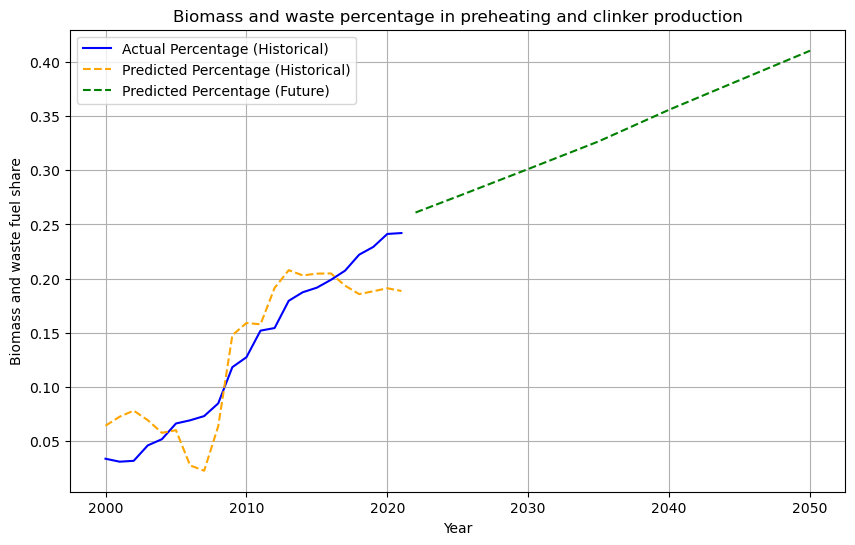

In [42]:
cement_projection_biomass_percentage= linear_regression_with_prediction(demand_sector_df=historic_cement_demand_ktoe,future_data_df=cement_forecast, column_name_LR="Biomass and waste fuel share", column_name_IV="Cement",column_name_IV_future= "Predicted Demand [ktoe]", graph_title = "Biomass and waste percentage in preheating and clinker production", save = False)


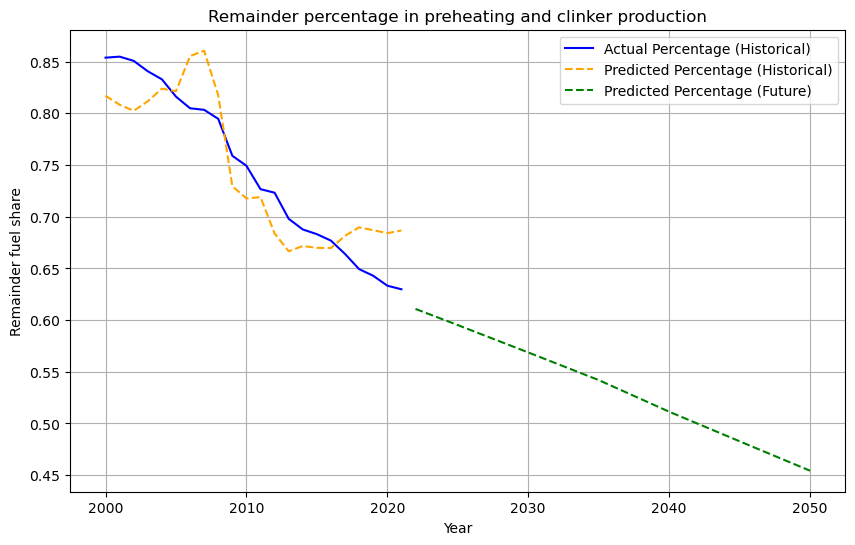

In [43]:
cement_projection_NG_H2_percentage = linear_regression_with_prediction(demand_sector_df=historic_cement_demand_ktoe,future_data_df=cement_forecast, column_name_LR="Remainder fuel share", column_name_IV="Cement",column_name_IV_future= "Predicted Demand [ktoe]", graph_title = "Remainder percentage in preheating and clinker production", save = False)

In [44]:
cement_projection_biomass_percentage.rename(columns={'Predicted Percentage': 'Predicted Biomass Percentage'}, inplace=True)
cement_projection_NG_H2_percentage.rename(columns={'Predicted Percentage': 'Predicted NG/H2 Percentage'}, inplace=True)


In [45]:
cement_forecast["Predicted Biomass Demand [GWh]"] = cement_forecast["Predicted Demand [GWh]"]*cement_projection_biomass_percentage["Predicted Biomass Percentage"]
cement_forecast["Predicted Remainder Demand [GWh]"] = cement_forecast["Predicted Demand [GWh]"]*cement_projection_NG_H2_percentage["Predicted NG/H2 Percentage"]


In [46]:
cement_forecast

,Predicted Demand [ktoe],Predicted Demand [GWh],Predicted Biomass Demand [GWh],Predicted Remainder Demand [GWh]
Year,,,,
2022-01-01,9829.843076,114321.074974,29839.595720,69829.579544
2023-01-01,9616.430341,111839.084864,29748.256870,67729.761894
2024-01-01,9403.017606,109357.094754,29632.217775,65655.854838
2025-01-01,9189.604871,106875.104644,29491.478436,63607.858376
2026-01-01,8973.128878,104357.488850,29323.484372,61556.936766
2027-01-01,8756.652885,101839.873056,29130.075897,59532.674914
2028-01-01,8540.176893,99322.257262,28911.253009,57535.072819
2029-01-01,8323.700900,96804.641468,28667.015710,55564.130481
2030-01-01,8107.224907,94287.025674,28397.363998,53619.847899


In [47]:
cement_projection_biomass_percentage["Predicted Biomass Percentage"]+cement_projection_NG_H2_percentage["Predicted NG/H2 Percentage"]

Year
2000-01-01    0.881470
2001-01-01    0.881062
2002-01-01    0.880789
2003-01-01    0.881218
2004-01-01    0.881792
2005-01-01    0.881672
2006-01-01    0.883263
2007-01-01    0.883504
2008-01-01    0.881493
2009-01-01    0.877380
2010-01-01    0.876828
2011-01-01    0.876887
2012-01-01    0.875244
2013-01-01    0.874440
2014-01-01    0.874676
2015-01-01    0.874596
2016-01-01    0.874587
2017-01-01    0.875140
2018-01-01    0.875522
2019-01-01    0.875394
2020-01-01    0.875257
2021-01-01    0.875380
2022-01-01    0.871836
2023-01-01    0.871592
2024-01-01    0.871348
2025-01-01    0.871104
2026-01-01    0.870857
2027-01-01    0.870609
2028-01-01    0.870362
2029-01-01    0.870115
2030-01-01    0.869867
2031-01-01    0.869618
2032-01-01    0.869368
2033-01-01    0.869118
2034-01-01    0.868868
2035-01-01    0.868619
2036-01-01    0.868333
2037-01-01    0.868047
2038-01-01    0.867761
2039-01-01    0.867475
2040-01-01    0.867189
2041-01-01    0.866922
2042-01-01    0.866655
2043-0

#### Ceramics
Switch from NG to electrical heating requires new oven design and high investment cost, TRL<4
Switch from NG to hydrogen technically possible within the existing plant design. However, no industrial application so far, TRL <5

Workaround: 
1. Substituting fossil fuels  in the process
2. Assuming SNG/Hydrogen as a replacement

In the process of thermal drying and sintering, and in the production - majority is provided by SNG/H2/etc.   
In the primary production the biomass share is increase according to linear regression. 


In [53]:
historic_ceramics_demand_ktoe = NMM_cleaned.iloc[(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics & other NMM"].index[0])]

In [54]:
historic_ceramics_demand_ktoe = transpose_uniformly(historic_ceramics_demand_ktoe)
historic_ceramics_demand_ktoe = historic_ceramics_demand_ktoe.to_frame()
historic_ceramics_demand_ktoe.columns=["Ceramics"]

C:\Users\flv.eco\AppData\Local\Temp\ipykernel_4444\3082393200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.drop(["EU27: Non-metallic mineral products / final energy consumption", "Code"], axis=0, inplace = True)


In [55]:
ceramics_sintering = ceramics.loc[(ceramics[ceramics["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics: Thermal drying and sintering"].index[0]):(ceramics[ceramics["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics: Microwave drying and sintering"].index[0]-1)]
ceramics_production = ceramics.loc[(ceramics[ceramics["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics: Thermal kiln"].index[0]):(ceramics[ceramics["EU27: Non-metallic mineral products / final energy consumption"] == "Ceramics: Electric kiln"].index[0])]

In [56]:
ceramics_sintering = transpose_uniformly(ceramics_sintering)
ceramics_production = transpose_uniformly(ceramics_production)

In [57]:
ceramics_sintering["Ceramics: Drying and sintering of raw material"] = ceramics_sintering["Ceramics: Thermal drying and sintering"]+ceramics_sintering["Ceramics: Steam drying and sintering"]
ceramics_production["Ceramics: Primary production process"] = ceramics_production["Ceramics: Thermal kiln"]+ceramics_production["Ceramics: Electric kiln"]

In [58]:
ceramics_production

EU27: Non-metallic mineral products / final energy consumption,Ceramics: Thermal kiln,Solids,LPG,Diesel oil and liquid biofuels,Fuel oil,Other liquids,Natural gas and biogas,Biomass and waste,Ceramics: Electric kiln,Ceramics: Primary production process
Year,,,,,,,,,,
2000-01-01,10520.175152,1774.408665,228.380047,183.784244,1024.373142,2399.900005,4471.608171,437.720877,703.539001,11223.714153
2001-01-01,10763.892788,1623.204456,219.578354,209.434565,851.020247,2753.418126,4670.467587,436.769454,741.850693,11505.743481
2002-01-01,10319.306267,1429.215849,209.843757,186.797678,865.605235,2813.240055,4385.878092,428.7256,732.739764,11052.046031
2003-01-01,11069.854259,1468.34724,186.786535,177.446589,677.976345,3187.064276,4701.751856,670.481419,734.758192,11804.612451
2004-01-01,11120.1275,1413.769886,143.844531,179.821406,624.7799,3560.922198,4455.483751,741.505829,751.659031,11871.786531
2005-01-01,11745.537122,1295.808995,133.935064,191.410691,566.197447,3908.839813,4674.736296,974.608817,786.033238,12531.570361
2006-01-01,9923.42185,1191.705903,115.119942,140.744149,538.292023,3138.977598,3818.781862,979.800371,699.828604,10623.250454
2007-01-01,10453.784899,1725.877086,111.218798,191.88818,534.772021,2905.403545,3914.146439,1070.47883,759.692704,11213.477603
2008-01-01,10576.582875,1572.831955,96.399565,205.548715,519.093503,3218.747353,3865.070221,1098.891562,763.039641,11339.622516


In [59]:
historic_ceramics_demand_ktoe["Share of Sintering"] = ceramics_sintering["Ceramics: Steam drying and sintering"]/historic_ceramics_demand_ktoe["Ceramics"]
historic_ceramics_demand_ktoe["Share of NG/Biogas in primary production of total"] = ceramics_production["Natural gas and biogas"]/historic_ceramics_demand_ktoe["Ceramics"]
historic_ceramics_demand_ktoe["Share of Biomass in primary production of total"] =  ceramics_production["Biomass and waste"]/historic_ceramics_demand_ktoe["Ceramics"]
historic_ceramics_demand_ktoe["Remainder share in primary thermal production of total"] = (ceramics_production["Ceramics: Thermal kiln"] - ceramics_production["Natural gas and biogas"] - ceramics_production["Biomass and waste"])/historic_ceramics_demand_ktoe["Ceramics"]


In [60]:
historic_ceramics_demand_ktoe

,Ceramics,Share of Sintering,Share of NG/Biogas in primary production of total,Share of Biomass in primary production of total,Remainder share in primary thermal production of total
Year,,,,,
2000-01-01,17090.493172,0.029959,0.261643,0.025612,0.328302
2001-01-01,17556.200216,0.030786,0.26603,0.024878,0.322203
2002-01-01,16882.715006,0.030214,0.259785,0.025394,0.326056
2003-01-01,17889.111858,0.029569,0.262828,0.03748,0.318497
2004-01-01,18019.256406,0.031729,0.247262,0.041151,0.328712
2005-01-01,18967.153542,0.031717,0.246465,0.051384,0.321408
2006-01-01,16157.992446,0.032206,0.23634,0.060639,0.317171
2007-01-01,17150.997373,0.031593,0.228217,0.062415,0.318883
2008-01-01,17285.439546,0.031216,0.223603,0.063573,0.324702


In [61]:
ceramics_forecast = pd.read_excel("../Scripts/Results/2025_01_29_ind_European Union - 27 countries (from 2020).xlsx", sheet_name="Ceramics_&_other_non_metallic_m")
ktoe_to_GWh = 11.63
ceramics_forecast = ceramics_forecast.set_index("Year")
ceramics_forecast.rename(columns={'Predicted Demand': 'Predicted Demand [ktoe]'}, inplace=True)
ceramics_forecast["Predicted Demand [GWh]"] = ceramics_forecast["Predicted Demand [ktoe]"]*ktoe_to_GWh

In [62]:
ceramics_forecast

,Predicted Demand [ktoe],Predicted Demand [GWh]
Year,,
2022-01-01,13637.782395,158607.409252
2023-01-01,13549.673507,157582.702885
2024-01-01,13461.564619,156557.996517
2025-01-01,13373.455731,155533.290150
2026-01-01,13284.082156,154493.875479
2027-01-01,13194.708582,153454.460808
2028-01-01,13105.335007,152415.046136
2029-01-01,13015.961433,151375.631465
2030-01-01,12926.587858,150336.216794


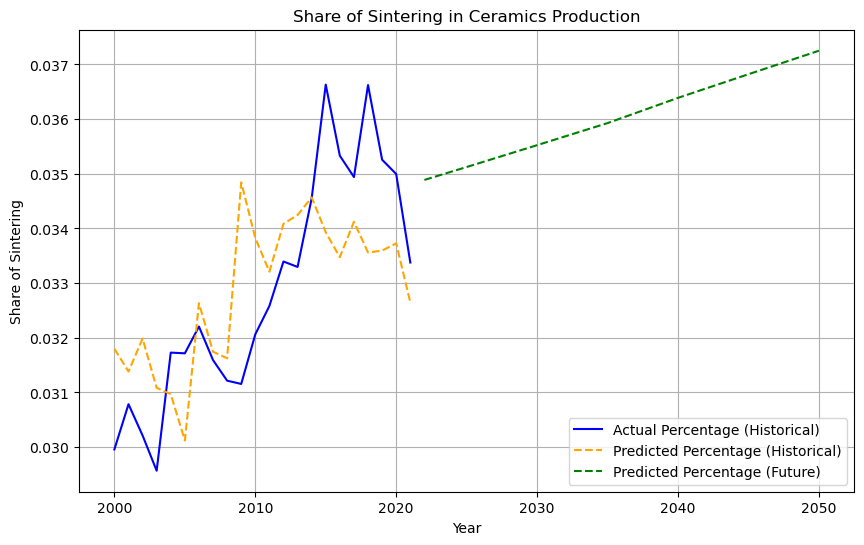

In [63]:
ceramics_projection_sintering_percentage = linear_regression_with_prediction(demand_sector_df=historic_ceramics_demand_ktoe,future_data_df=ceramics_forecast, column_name_LR="Share of Sintering", column_name_IV="Ceramics",column_name_IV_future= "Predicted Demand [ktoe]", graph_title = "Share of Sintering in Ceramics Production", save = False)

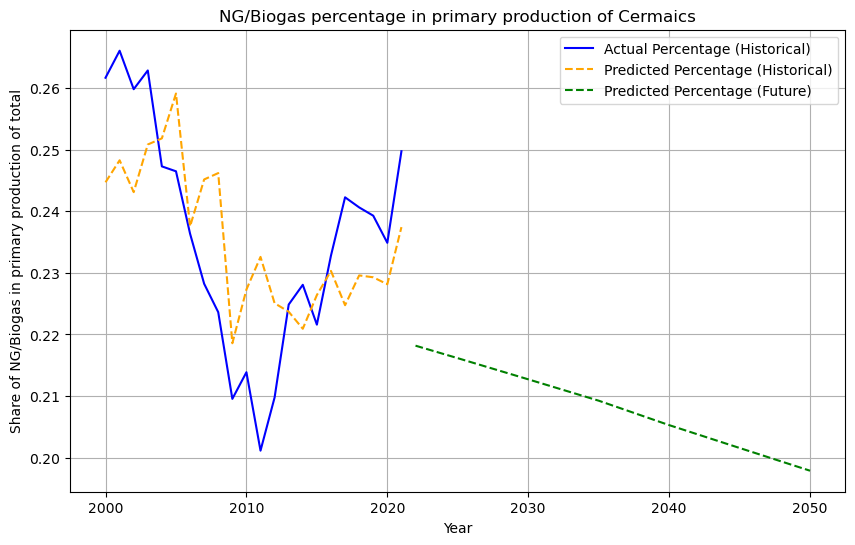

In [ ]:
ceramics_projection_NG_biogas_percentage = linear_regression_with_prediction(demand_sector_df=historic_ceramics_demand_ktoe,future_data_df=ceramics_forecast, column_name_LR="Share of NG/Biogas in primary production of total", column_name_IV="Ceramics",column_name_IV_future= "Predicted Demand [ktoe]", graph_title = "NG/Biogas percentage in primary production of Ceramics", save = False)

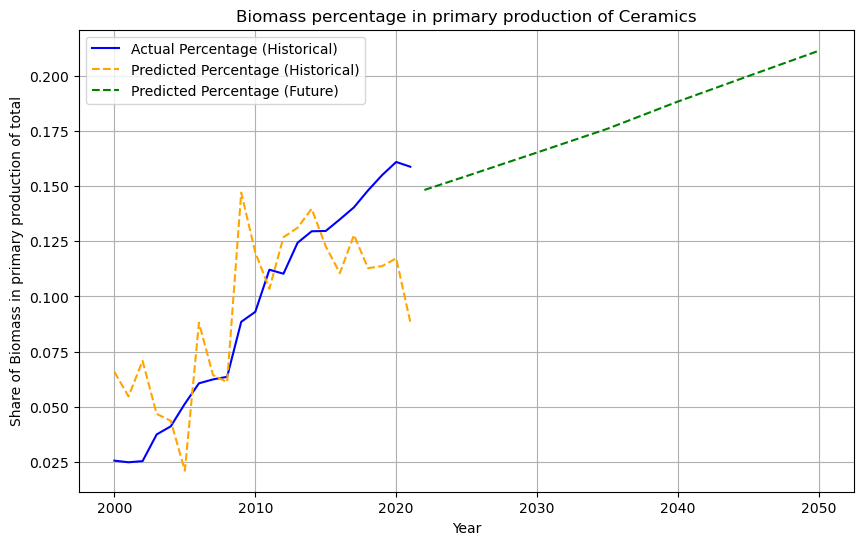

In [66]:
ceramics_projection_biomass_percentage = linear_regression_with_prediction(demand_sector_df=historic_ceramics_demand_ktoe,future_data_df=ceramics_forecast, column_name_LR="Share of Biomass in primary production of total", column_name_IV="Ceramics",column_name_IV_future= "Predicted Demand [ktoe]", graph_title = "Biomass percentage in primary production of Ceramics",  save = False)

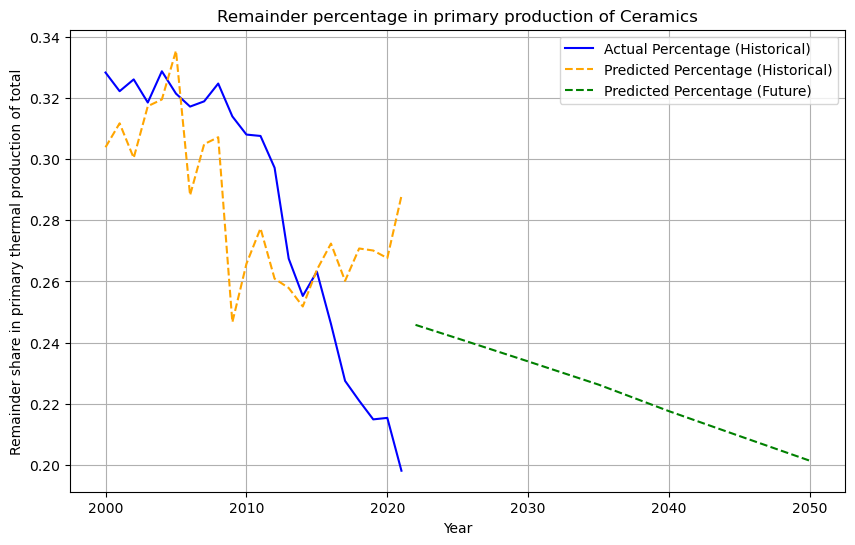

In [65]:
ceramics_projection_remainder_percentage = linear_regression_with_prediction(demand_sector_df=historic_ceramics_demand_ktoe,future_data_df=ceramics_forecast, column_name_LR="Remainder share in primary thermal production of total", column_name_IV="Ceramics",column_name_IV_future= "Predicted Demand [ktoe]",graph_title = "Remainder percentage in primary production of Ceramics", save = False)

In [68]:
ceramics_projection_sintering_percentage.rename(columns={'Predicted Percentage': 'Predicted Sintering Percentage'}, inplace=True)
ceramics_projection_NG_biogas_percentage.rename(columns={'Predicted Percentage': 'Predicted NG/H2 Percentage'}, inplace=True)
ceramics_projection_biomass_percentage.rename(columns={'Predicted Percentage': 'Predicted Biomass Percentage'}, inplace=True)
ceramics_projection_remainder_percentage.rename(columns={'Predicted Percentage': 'Predicted Remainder Percentage'}, inplace=True)


In [69]:
ceramics_projection_sintering_percentage["Predicted Sintering Percentage"]+ceramics_projection_NG_biogas_percentage["Predicted NG/H2 Percentage"]+ceramics_projection_biomass_percentage["Predicted Biomass Percentage"]+ceramics_projection_remainder_percentage["Predicted Remainder Percentage"]

Year
2000-01-01    0.646188
2001-01-01    0.646064
2002-01-01    0.646243
2003-01-01    0.645975
2004-01-01    0.645940
2005-01-01    0.645687
2006-01-01    0.646437
2007-01-01    0.646172
2008-01-01    0.646136
2009-01-01    0.647095
2010-01-01    0.646792
2011-01-01    0.646608
2012-01-01    0.646869
2013-01-01    0.646917
2014-01-01    0.647013
2015-01-01    0.646823
2016-01-01    0.646687
2017-01-01    0.646881
2018-01-01    0.646713
2019-01-01    0.646723
2020-01-01    0.646763
2021-01-01    0.646440
2022-01-01    0.647109
2023-01-01    0.647132
2024-01-01    0.647156
2025-01-01    0.647179
2026-01-01    0.647203
2027-01-01    0.647227
2028-01-01    0.647251
2029-01-01    0.647274
2030-01-01    0.647298
2031-01-01    0.647322
2032-01-01    0.647346
2033-01-01    0.647370
2034-01-01    0.647394
2035-01-01    0.647418
2036-01-01    0.647446
2037-01-01    0.647474
2038-01-01    0.647501
2039-01-01    0.647529
2040-01-01    0.647556
2041-01-01    0.647582
2042-01-01    0.647608
2043-0

In [70]:
ceramics_forecast["Predicted Sintering Demand [GWh]"] = ceramics_forecast["Predicted Demand [GWh]"]*ceramics_projection_sintering_percentage["Predicted Sintering Percentage"]
ceramics_forecast["Predicted NG/H2 Demand [GWh]"] = ceramics_forecast["Predicted Demand [GWh]"]*ceramics_projection_NG_biogas_percentage["Predicted NG/H2 Percentage"]
ceramics_forecast["Predicted Biomass Demand [GWh]"] = ceramics_forecast["Predicted Demand [GWh]"]*ceramics_projection_biomass_percentage["Predicted Biomass Percentage"]
ceramics_forecast["Predicted Remainder Demand [GWh]"] = ceramics_forecast["Predicted Demand [GWh]"]*ceramics_projection_remainder_percentage["Predicted Remainder Percentage"]

In [71]:
ceramics_forecast

,Predicted Demand [ktoe],Predicted Demand [GWh],Predicted Sintering Demand [GWh],Predicted NG/H2 Demand [GWh],Predicted Biomass Demand [GWh],Predicted Remainder Demand [GWh]
Year,,,,,,
2022-01-01,13637.782395,158607.409252,5533.360070,34603.494830,23509.575701,38989.777051
2023-01-01,13549.673507,157582.702885,5510.025195,34273.336669,23689.018216,38504.433594
2024-01-01,13461.564619,156557.996517,5486.528870,33944.564839,23864.151685,38022.126154
2025-01-01,13373.455731,155533.290150,5462.871095,33617.179339,24034.976108,37542.854731
2026-01-01,13284.082156,154493.875479,5438.708799,33286.510976,24203.850225,37059.805696
2027-01-01,13194.708582,153454.460808,5414.380385,32957.269026,24368.290707,36579.880461
2028-01-01,13105.335007,152415.046136,5389.885853,32629.453490,24528.297555,36103.079023
2029-01-01,13015.961433,151375.631465,5365.225201,32303.064368,24683.870768,35629.401384
2030-01-01,12926.587858,150336.216794,5340.398431,31978.101660,24835.010346,35158.847542


#### Glas
Difference between two processes: 
1. Containerglas in U shaped flame tray  
Percentage in energy consumption in Germany: 33-34%  
Electrification for small plant have a TRL 9, bigger plants <4  
Hydrogen fired burner, TRL <4
2. Continouus melting flat glass 
Percentage in energy consumption in Germany: 42-45%  
Electrification  <3  
Hydrogen fired burner, TRL <4

Workaround, assume that 44% of the demand in the melting process cannot be electriefied and therefore demand hydrogen after year 2040

In [72]:
historic_glass_demand_ktoe = NMM_cleaned.iloc[(NMM_cleaned[NMM_cleaned["EU27: Non-metallic mineral products / final energy consumption"] == "Glass production"].index[0])]
historic_glass_demand_ktoe = transpose_uniformly(historic_glass_demand_ktoe)
historic_glass_demand_ktoe = historic_glass_demand_ktoe.to_frame()
historic_glass_demand_ktoe.columns=["Glass"]

C:\Users\flv.eco\AppData\Local\Temp\ipykernel_4444\3082393200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T.drop(["EU27: Non-metallic mineral products / final energy consumption", "Code"], axis=0, inplace = True)


In [73]:
glass_thermal_melting = glass.loc[(glass[glass["EU27: Non-metallic mineral products / final energy consumption"] == "Glass: Thermal melting tank"].index[0]):(glass[glass["EU27: Non-metallic mineral products / final energy consumption"] == "Glass: Electric melting tank"].index[0]-1)]


In [74]:
glass_thermal_melting = transpose_uniformly(glass_thermal_melting)

In [75]:
historic_glass_demand_ktoe["Share of Thermal melting"] = glass_thermal_melting["Glass: Thermal melting tank"]/historic_glass_demand_ktoe["Glass"]


In [76]:
historic_glass_demand_ktoe

,Glass,Share of Thermal melting
Year,,
2000-01-01,6606.281589,0.658468
2001-01-01,6649.475787,0.650888
2002-01-01,6606.333919,0.64464
2003-01-01,6562.161001,0.659605
2004-01-01,6630.957675,0.656458
2005-01-01,6431.728921,0.655924
2006-01-01,6630.750884,0.650421
2007-01-01,6572.847944,0.646949
2008-01-01,6427.841329,0.651185


In [77]:
glass_forecast = pd.read_excel("../Scripts/Results/2025_01_29_ind_European Union - 27 countries (from 2020).xlsx", sheet_name="Glass_production")
ktoe_to_GWh = 11.63
glass_forecast = glass_forecast.set_index("Year")
glass_forecast.rename(columns={'Predicted Demand': 'Predicted Demand [ktoe]'}, inplace=True)
glass_forecast["Predicted Demand [GWh]"] = glass_forecast["Predicted Demand [ktoe]"]*ktoe_to_GWh

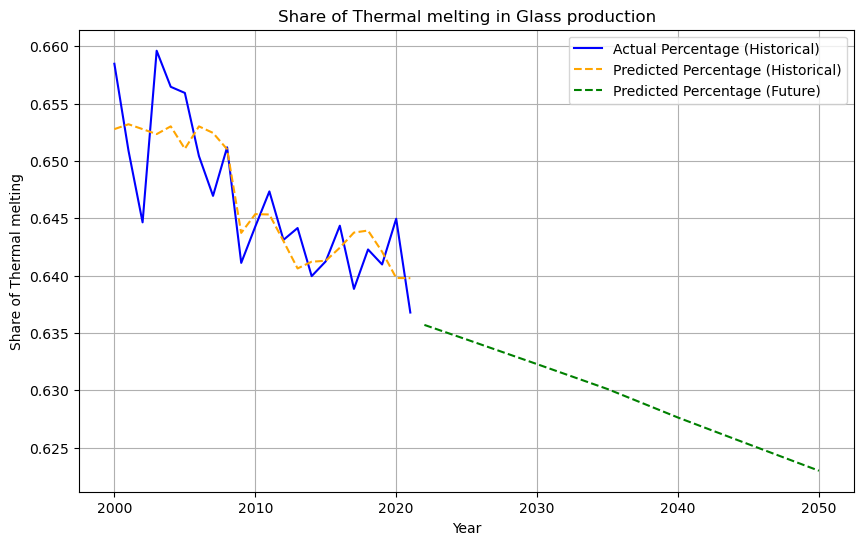

In [78]:
glass_projection_thermal_melting_percentage = linear_regression_with_prediction(demand_sector_df=historic_glass_demand_ktoe,future_data_df=glass_forecast, column_name_LR="Share of Thermal melting", column_name_IV="Glass",column_name_IV_future= "Predicted Demand [ktoe]",graph_title = "Share of Thermal melting in Glass production", save = False)

In [79]:
glass_projection_thermal_melting_percentage.rename(columns={'Predicted Percentage': 'Predicted Thermal Melting Percentage'}, inplace=True)


In [80]:
glass_forecast["Predicted NG/H2 Demand [GWh]"] = glass_forecast["Predicted Demand [GWh]"]*glass_projection_thermal_melting_percentage["Predicted Thermal Melting Percentage"]


In [81]:
glass_forecast

,Predicted Demand [ktoe],Predicted Demand [GWh],Predicted NG/H2 Demand [GWh]
Year,,,
2022-01-01,4871.338103,56653.662135,36014.490708
2023-01-01,4828.262920,56152.697763,35672.227086
2024-01-01,4785.187738,55651.733390,35330.388175
2025-01-01,4742.112555,55150.769018,34988.973973
2026-01-01,4698.419086,54642.613965,34643.093121
2027-01-01,4654.725616,54134.458912,34297.649259
2028-01-01,4611.032146,53626.303859,33952.642386
2029-01-01,4567.338676,53118.148806,33608.072504
2030-01-01,4523.645207,52609.993753,33263.939611
